In [1]:
from utils import *
from kNN import *
from decision_tree import *
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#data read
np.random.seed(11)
train_x, train_y, test_x, test_y = read_and_prepare("heart.csv", "target", 0.8)

1
2
3
4
5
6
7
8
9
10
11
12
13
[59.01639344262295, 85.24590163934425, 86.88524590163934, 93.44262295081968, 93.44262295081968, 93.44262295081968, 93.44262295081968, 93.44262295081968, 93.44262295081968, 93.44262295081968, 93.44262295081968, 93.44262295081968, 93.44262295081968]


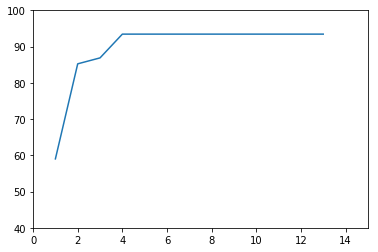

In [4]:
#decision tree
max_depth = 13


accuracies = []
for i in range(1, max_depth + 1):
    dt = decision_tree(i, 0.8)
    dt.fit(train_x, train_y)
    preds = dt.test(test_x)
    accuracies.append(accuracy(preds, test_y))
    print(i)
  

preds_decision_tree = dt.test(test_x)
print(accuracies)
plt.plot([i for i in range(1, max_depth + 1)], accuracies)
plt.axis([0, 15, 40, 100])
plt.show()


<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; font-weight: bold">
تحلیل درخت تصمیم</div>
<br>            

همانطور که در نمودار بالا مشاهده می‌کنید، دقت مدل با افزایش عمق ابتدا افزایش یافته و سپس تقریبا ثابت می‌ماند و می‌توان گفت از عمق 5 به بعد دقت مدل افزایش نمی‌یابد. 

<br>
خیر زیرا برای یافتن عمق مناسب از داده‌ی تست استفاده کرده‌ایم و این معیار مناسب نمی‌باشد زیرا باید مدل را روی داده‌ای که تا کنون مدل ندیده‌ است و از آن در آموزش و ساخت مدل استفاده نشده است، تست کرد.
</div>    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
[59.01639344262295, 59.01639344262295, 63.934426229508205, 57.377049180327866, 70.49180327868852, 65.57377049180327, 68.85245901639344, 65.57377049180327, 67.21311475409836, 59.01639344262295, 62.295081967213115, 59.01639344262295, 60.65573770491803, 60.65573770491803, 67.21311475409836]


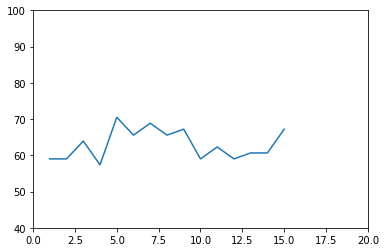

In [19]:
#knn
max_k = 15

accuracies = []
for i in range(1, max_k + 1):
    knn = kNN(i)
    knn.fit(train_x, train_y)
    preds = knn.test(test_x)
    accuracies.append(accuracy(preds, test_y))
    print(i)

print(accuracies)
plt.plot([i for i in range(1, max_k + 1)], accuracies)
plt.axis([0, 20, 40, 100])
plt.show()


In [6]:
#5 fold validation

best_param = 0
best_acc = 0
best_model = None
for i in range(1, max_k + 1):
    knn = kNN(i)
    val_x, val_y = make_cross_val(train_x, train_y, 5)

    c = i % 5
    train_x_new = val_x[c][1]
    train_y_new = val_y[c][1]

    val_set_x = val_x[c][0]
    val_set_y = val_y[c][0]


    knn.fit(train_x_new, train_y_new)
    preds = knn.test(val_set_x)
    acc = accuracy(preds, val_set_y)
    if acc > best_acc:
        best_acc = acc
        best_param = i
        best_model = knn
    print(i)
    
preds_knn = best_model.test(test_x)
acc = accuracy(preds_knn, test_y)
print(acc)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
68.85245901639344


In [18]:
cf_decision = confusion_matrix(preds_decision_tree, test_y)
print(cf_decision)

r_decision = classification_report(preds_decision_tree, test_y)
r_decision.print_report()

[[34, 2], [2, 23]]
accuracy:  93.44262295081968
percision:  0.9444444444444444
recall:  0.9444444444444444
specificity:  0.92
f1-score:  0.9444444444444444


In [17]:
cf_knn = confusion_matrix(preds_knn, test_y)
print(cf_knn)

r_knn = classification_report(preds_knn, test_y)
r_knn.print_report()

[[27, 10], [9, 15]]
accuracy:  68.85245901639344
percision:  0.7297297297297297
recall:  0.75
specificity:  0.6
f1-score:  0.7397260273972601


In [7]:
t_test(preds_decision_tree, preds_knn)

-0.18318582636182815

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; font-weight: bold">
تحلیل تست t</div>
<br>            
از عدد به دست آمده پیدا است که توزیعی که توسط دو مدل پیدا شده است به یکدیگر نزدیکند.
</div>    